 ## Emergency- 911 Calls Exploratory Analysis Project ##

Data available at https://www.kaggle.com/datasets/mchirico/montcoalert 

The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)




 ## by Ivan Chan
 Linkedin:
https://www.linkedin.com/in/ivan-chan-b84688230/

Tableau  Portfolio:
https://public.tableau.com/app/profile/cheukfai.chan/viz/Portfolio_16497218502130/Dashboard1




## Data and Setup

** Import Data and Library **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
df = pd.read_csv('911.csv')

/Users/faifaifai/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


** Check the data **

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [3]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Data analysis

** Top 5 zipcodes for 911 calls **

In [4]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** Top 5 townships (twp) for 911 calls **

In [5]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

-- Lower Merion had the highest amount of calls, which is 8443 calls.--

** Cheuk the number of unique title codes are in the 'title' column **

In [6]:
df['title'].nunique()

110

## Creating new features

** Organise the 'title' column and classify them into 'EMS','Traffic' and 'Fire'. ** 



In [7]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [8]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** 911 calls by Reason. **

[Text(0.5, 1.0, 'Reason of the call')]

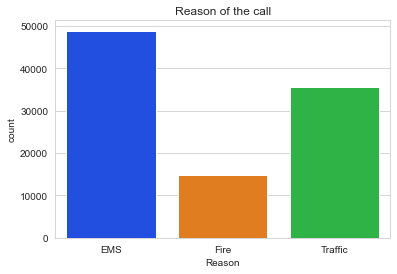

In [9]:
sns.countplot(x='Reason',data=df,palette='bright').set(title='Reason of the call')

-- The highest counts of reason is emergency services.Other than that , a large volume of calls come from Traffic. --

** Organise the 'timeStamp' column and convert them from strings to DateTime objects. **


In [10]:
type(df['timeStamp'].iloc[0])

str

In [11]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** Classify 'timeStamp' column into 'Hour', 'Month', and 'Day of Week' column. **

In [12]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

** Map the actual string names to the day of the week **

In [13]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [14]:
df['Day of Week'] = df['Day of Week'].map(dmap)

** Count of calls by day of week **

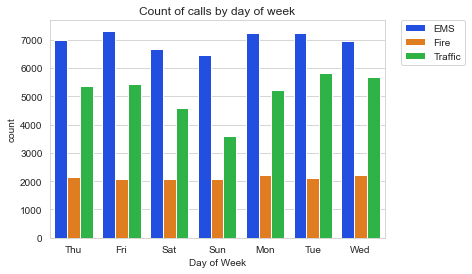

In [15]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='bright').set(title='Count of calls by day of week')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** Count of calls by Month**

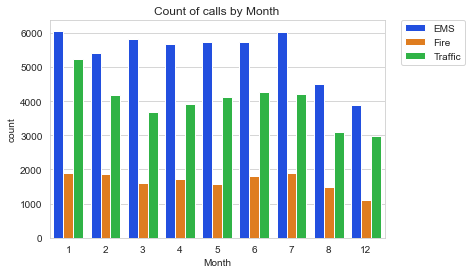

In [16]:
sns.countplot(x='Month',data=df,hue='Reason',palette='bright').set(title='Count of calls by Month')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

-- Both of the chart above also showed that Traffic has a large amount of calls and government should need to slove it. --

**Missing Data. Count of calls by Month doesn't show the data of 9 ,10 and 11.**


**As a result, the 'month' column will be groupped.**

In [17]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Count of calls per month. **

[Text(0.5, 1.0, 'Call per Month')]

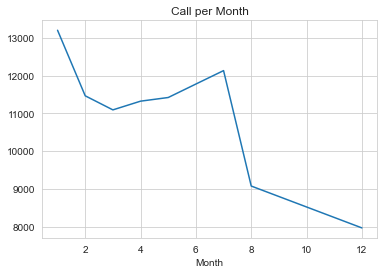

In [18]:

byMonth['twp'].plot().set(title='Call per Month')

-- A Great and constantlt fall started from July. According to research, July usually is the starting of Summer in Montgomery Country.  --

** Linear Regression between 'Timestamp' and 'Month'. **

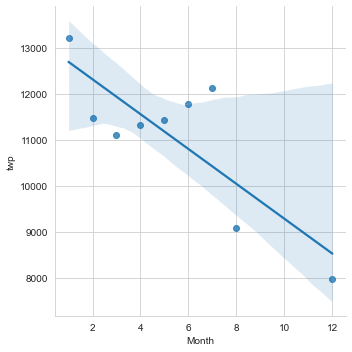

In [19]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

-- 'Timestamp' and 'Month' have a negative linear relationship. --

** 'Date' is added which contains the date from the timeStamp column. ** 

In [20]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

** Counts of 911 calls by Date.**

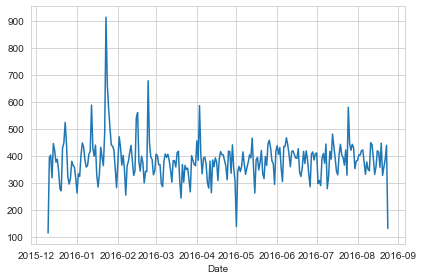

In [21]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

** Reason[Traffic] for the 911 call **

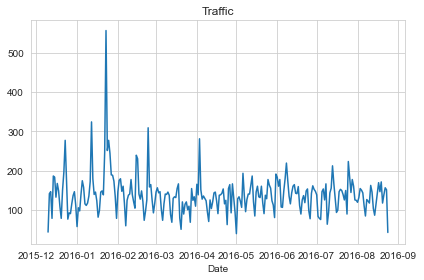

In [22]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()


** Reason[Fire] for the 911 call **

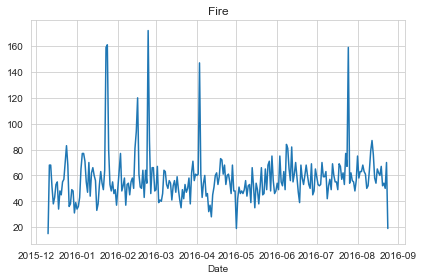

In [23]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

** Reason[EMS] for the 911 call **

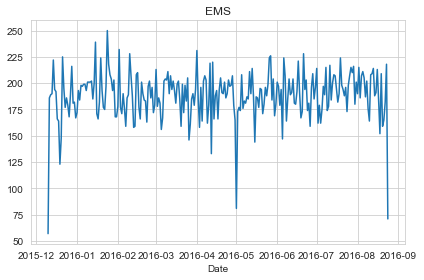

In [24]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

** Organise the data and then gather them into heatmap **

In [25]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Heatmap of 'Hour' **

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

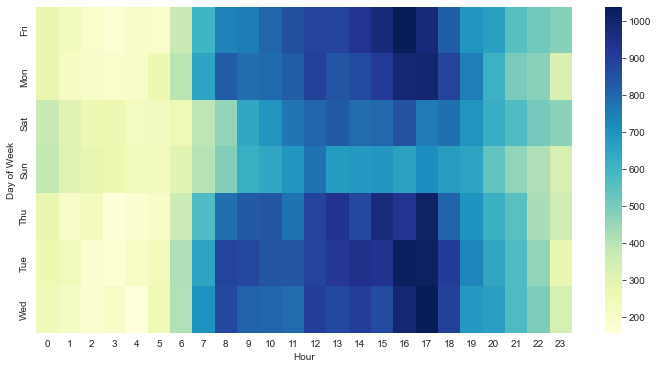

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='YlGnBu')

-- 1600 - 1800 in every working day have the largest amount of calls, which are peak hours. --

** Heatmap of 'Month' **

In [27]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

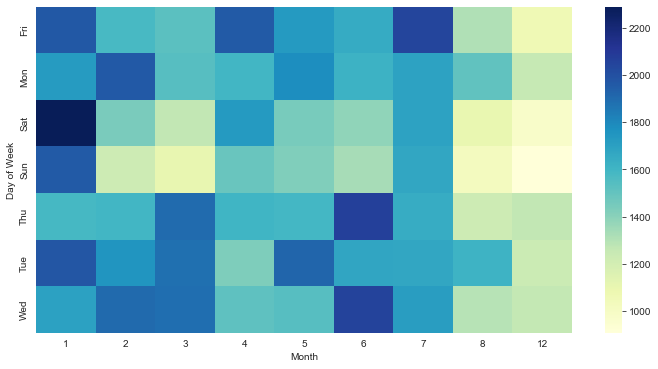

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='YlGnBu')

-- This heat map has shown that January has the highest call per month and the highest call by day of week is on Saturday in Junuary.
According to research, January has the lowest temperature in Montgomery Countries. --

## Conclusion ##

**
The Bar Chart have shown that the amount of calls from the reason of traffic is high.
Government should deal with it.
Moreover,1600 - 1800 in every working day and every January have the largest amount of calls.
It may be related to weather.
**

## Insight ##

**
My first prediction is call from Traffic problem may effect the efficiency of emergency services.
As mentioned above, data have shown that large amount of call is from the traffic problem. 


-- **The hotline may be overloaded during the peak hour.It is because there are only one hotline.** --
**

** 
Moreover, Government should also investigate why citizen needs more emergency service during winter timer. As mentioned above, data have shown that large amount of call is from winter.

-- **Government may do more prevention work during summer in order to deal with the high amount  of calls during winter.** --
**

## Recommandation ##

**
In order to deal with the overloaded hotline problem, Government can open one more specific hotline for the call from Traffic problem. As there are two hotlines if government can do so, It can classify the call by emergency and traffic which can effectively decrease the opportunities of overloading the same hotline in peak hours.As a result, the waiting time of emergency case can significant decrease. More life can be saved.


Moreover, Government should  investigate the reason why there are so many traffic calls and see is there any problem related to the road design or road limitation such as the speed limit of the road or the brightness of the road during winter. Furthermore, the most dangerous case and the most frequent case will be the first priority and mainly focused topics. 

 Other than the traffic problem,, Government should investigate the reason why the volume of call is extremely high in winter and see if government may do more prevention work during summer in order to deal with the high amount  of calls during winter. **


--END